<a href="https://colab.research.google.com/github/Peksyaji/Data_Mining_and_BI/blob/main/DatMin3_Association_Rules.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kelompok D Data Mining (B)

Abiel. A (2006532891)

Dwight H (2006571160)

Felicia (2006463976)

Nisrina A (2006571072)

Nurrochmi Andina (2006571103)

Peksyaji (2006522322)

Yasmin K (2006571091)

In [1]:
!pip install mlxtend
!pip install apyori

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from apyori import apriori
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import datetime

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/felicia2602/study_case_03/main/assoc_rule.csv', sep=';')
df.sample(10)

,ID Transaksi,Tanggal,Konsumen,ID Produk,Nama Produk,Merek,Jumlah
21,7,2022-07-04 00:00:00,Mr. Z,10,Air Minum,Sprit,1
7,2,2022-07-01 00:00:00,Mr. B,5,Shampoo,Clean,1
32,9,2022-07-05 00:00:00,Mr. X,11,Mie Instan,Indomi,2
6,2,2022-07-01 00:00:00,Mr. B,3,Roti,Prambanan,1
22,7,2022-07-04 00:00:00,Mr. Z,9,Rokok,Malioboro,1
28,9,2022-07-05 00:00:00,Mr. X,2,Air Minum,Aquos,1
41,12,2022-07-06 00:00:00,Mr. G,11,Mie Instan,Indomi,1
3,1,2022-07-01 00:00:00,Mr. A,12,Mie Instan,Mi Sedap,1
47,14,2022-07-07 00:00:00,Mr.Y,6,Snack,Chiki,1
9,3,2022-07-02 00:00:00,Mr. C,5,Shampoo,Clean,1


# Preprocessing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID Transaksi  56 non-null     int64 
 1   Tanggal       56 non-null     object
 2   Konsumen      56 non-null     object
 3   ID Produk     56 non-null     int64 
 4   Nama Produk   56 non-null     object
 5   Merek         56 non-null     object
 6   Jumlah        56 non-null     int64 
dtypes: int64(3), object(4)
memory usage: 3.2+ KB


In [5]:
# Cek duplikasi
df.duplicated().sum()

0

In [6]:
# Mengubah tipe data 'Tanggal' menjadi datetime
df['Tanggal'] = pd.to_datetime(df['Tanggal'])

In [7]:
# Cek produk yang tersedia
print('Produk: ', set(df['Nama Produk']))

# Cek merek
print('Merek: ', set(df['Merek']))

Produk:  {'Shampoo', 'Air Minum', 'Roti', 'Mie Instan', 'Snack', 'Sabun', 'Rokok'}
Merek:  {'Indomi', 'Clean', 'Lifboy', 'Sri Roti', 'Mi Sedap', 'Citata', 'Sprit', 'Chiki', 'Aquos', 'Malioboro', 'Prambanan', 'Luks'}


Dari output code di atas, dapat kita simpulkan bahwa data yang diberikan oleh perusahaan Alfaindo:


1.   Sudah cukup baik dan lengkap, karena tidak ditemukan adanya typo maupun data yang hilang pada kolom nama produk dan merek.
2.   Hanya saja sampel data yang diberikan terlalu sedikit sehingga kemungkinan besar intepretasi yang dihasilkan tidak sesuai dengan kenyataan.


Kami juga melakukan asumsi bahwa pelanggan-pelanggan yang membeli di Alfaindo dan tercatat dalam data ini adalah pelanggan yang telah memiliki kartu membership Alfaindo.

In [8]:
basket = (df.groupby(['ID Transaksi', 'Nama Produk'])['Jumlah'].count()\
                                      .unstack().reset_index().fillna(0)\
                                      .set_index('ID Transaksi'))
basket.head()

Nama Produk,Air Minum,Mie Instan,Rokok,Roti,Sabun,Shampoo,Snack
ID Transaksi,,,,,,,
1,1.0,2.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,1.0,1.0
3,0.0,0.0,1.0,0.0,1.0,1.0,0.0
4,1.0,1.0,0.0,1.0,1.0,0.0,1.0
5,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [9]:
# One hot encoding. Untuk melabeli apakah seorang pembeli membeli produk tersebut atau tidak (tidak dilihat jumlah frekuensi, hanya membeli produknya atau tidak)
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units)
basket_sets.head(5)

Nama Produk,Air Minum,Mie Instan,Rokok,Roti,Sabun,Shampoo,Snack
ID Transaksi,,,,,,,
1,1,1,0,1,0,0,0
2,1,0,0,1,0,1,1
3,0,0,1,0,1,1,0
4,1,1,0,1,1,0,1
5,1,0,0,0,0,0,1


In [10]:
frequent_itemsets = apriori(basket_sets, min_support=0.1, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.611111,(Air Minum)
1,0.333333,(Mie Instan)
2,0.277778,(Rokok)
3,0.500000,(Roti)
4,0.444444,(Sabun)
5,0.333333,(Shampoo)
6,0.500000,(Snack)
7,0.166667,"(Mie Instan, Air Minum)"
8,0.111111,"(Rokok, Air Minum)"
9,0.444444,"(Roti, Air Minum)"


In [11]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.sort_values(by='lift', ascending=False, na_position='last', inplace = True)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
169,"(Roti, Sabun)","(Snack, Mie Instan, Air Minum)",0.166667,0.111111,0.111111,0.666667,6.0,0.092593,2.666667
152,"(Snack, Mie Instan, Air Minum)","(Roti, Sabun)",0.111111,0.166667,0.111111,1.000000,6.0,0.092593,inf
164,"(Sabun, Air Minum)","(Mie Instan, Roti, Snack)",0.166667,0.111111,0.111111,0.666667,6.0,0.092593,2.666667
157,"(Mie Instan, Roti, Snack)","(Sabun, Air Minum)",0.111111,0.166667,0.111111,1.000000,6.0,0.092593,inf
84,"(Roti, Sabun)","(Mie Instan, Air Minum)",0.166667,0.166667,0.111111,0.666667,4.0,0.083333,2.500000


# EDA&Visualisasi

## Jumlah item yang paling banyak dibeli
Berikut akan dilihat menggunakan grafik batang untuk melihat jumlah item yang paling banyak dibeli oleh pembeli

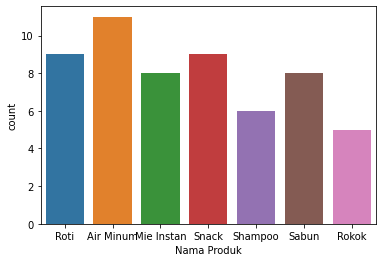

In [12]:
p = sns.countplot(x="Nama Produk", data=df)



*   Dari plot di atas, dapat dilihat bahwa nama produk yang paling laku adalah Air minum. Oleh karena itu, dapat disarankan kepada AlfaIndo untuk menambahkan stock atau variasi merek dalam kategori produk tersebut.
*   Dari plot diatas dapat dilihat bahwa mie instan dan sabun memiliki grafik batang yang similar dan memiliki angka lift yang tinggi, yang menandakan bahwa jika seseorang membeli mie instan maka besar kemungkinannya mereka juga akan membeli sabun dan berlaku sebaliknya. Sementara shampoo relatif sedikit untuk dibeli. Oleh karena itu, kami sarankan kepada Alfaindo untuk menempatkan produk shampoo berdekatan dengan produk sabun dengan harapan dapat meningkatkan penjualan shampoo. Selain itu, AlfaIndo juga dapat memberikan paket pembelian sabun dan shampoo sehingga diharapkan dapat meningkatkan penjualan shampoo.



## Jumlah merek yang paling banyak dibeli
Berikut akan dilihat menggunakan grafik batang untuk melihat banyaknya merek yang terjual

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

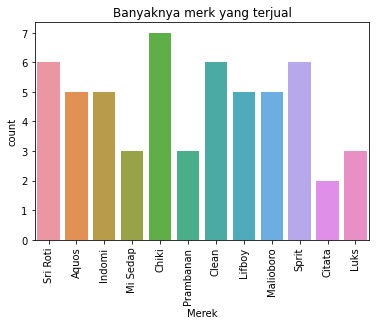

In [13]:
sns.countplot(x="Merek",  data=df)
plt.title('Banyaknya merk yang terjual')
plt.xticks(rotation='vertical')



*   Dari plot diatas, Kita dapat merekomendasikan Alfaindo untuk mengatur proporsi stok setiap tipe produk sesuai dengan "demand" merek yang paling sering dibeli oleh konsumen. Agar Alfaindo dapat menjaga efesiensi kesediaan stok mereka.
*   Dari plot diatas, dapat dilihat bahwa untuk merek "Mi Sedap", "Luks", "Prambanan", dan "Citata" merupakan merek dengan penjualan yang tergolong rendah dibandingkan merek lain. Kita dapat merekomendasikan perusahaan Alfaindo untuk memberikan promo khusus, "bundle" murah, dan memindahkan merek-merek tersebut ke etalase khusus agar dapat lebih terlihat dan menarik konsumen.



## Jumlah frekuensi transaksi masing-masing konsumen
berikut akan dilihat menggunakan grafik batang untuk melihat frekuensi transaksi oleh masing-masing konsumen

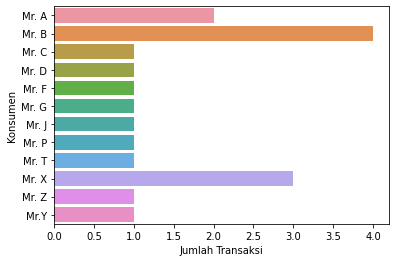

In [14]:
df2 = df.groupby(['ID Transaksi','Konsumen'])['Jumlah'].sum().to_frame(name = 'Jumlah Barang yang Dibeli').reset_index()
df3 = df2.groupby('Konsumen')['ID Transaksi'].count().to_frame(name = 'Jumlah Transaksi').reset_index()

sns.barplot(x = 'Jumlah Transaksi', y = 'Konsumen', data = df3)

Dari plot di atas, dapat dilihat bahwa dalam kurun waktu 3 bulan, Mr. B dan Mr. X merupakan 2 pelanggan Alfaindo yang paling banyak frekuensi transaksinya dibandingkan dengan pelanggan yang lain. Oleh karena itu, berdasarkan output diatas kami menyarankan PT. Alfaindo untuk menambahkan fitur cashback sebagai bonus yang didapatkan oleh membership PT. Alfaindo tersebut sehingga hal ini dapat meningkatkan loyalitas pelanggan.

## Support masing-masing produk
Berikut akan dilihat menggunakan grafik batang untuk melihat support dari produk-produk yang ada

Text(0.5, 1.0, 'Support dari masing-masing produk')

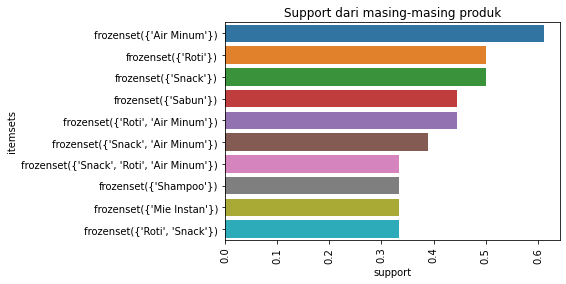

In [15]:
sns.barplot(x="support", y="itemsets", data=frequent_itemsets.sort_values('support',ascending=False).head(10))
plt.xticks(rotation='vertical')
plt.title('Support dari masing-masing produk')



*   Dari plot support produk di atas, dapat dilihat bahwa nama produk yang paling laku jika dibandingkan dengan seluruh total transaksi yang ada adalah air minum. Oleh karena itu, dapat disarankan kepada AlfaIndo untuk menambahkan stock atau variasi merek dalam kategori produk tersebut.
*   Dari plot support produk diatas, dapat dilihat bahwa frekuensi pembelian shampoo relatif lebih rendah dibandingkan dengan frekuensi banyaknya pembelian sabun jika dibandingkan dengan seluruh total transaksi yang ada. Oleh karena itu, kami sarankan kepada Alfaindo untuk menempatkan produk shampoo berdekatan dengan produk sabun dengan harapan dapat meningkatkan penjualan shampoo. Selain itu, AlfaIndo juga dapat memberikan paket pembelian sabun dan shampoo sehingga diharapkan dapat meningkatkan penjualan shampoo.



# Market Basket Analysist

## Market Basket Analysis untuk Produk

In [16]:
frequent_itemsets = apriori(basket_sets, min_support=0.1, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.611111,(Air Minum)
1,0.333333,(Mie Instan)
2,0.277778,(Rokok)
3,0.500000,(Roti)
4,0.444444,(Sabun)
5,0.333333,(Shampoo)
6,0.500000,(Snack)
7,0.166667,"(Mie Instan, Air Minum)"
8,0.111111,"(Rokok, Air Minum)"
9,0.444444,"(Roti, Air Minum)"


In [17]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.sort_values(by='lift', ascending=False, na_position='last', inplace = True)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
169,"(Roti, Sabun)","(Snack, Mie Instan, Air Minum)",0.166667,0.111111,0.111111,0.666667,6.0,0.092593,2.666667
152,"(Snack, Mie Instan, Air Minum)","(Roti, Sabun)",0.111111,0.166667,0.111111,1.000000,6.0,0.092593,inf
164,"(Sabun, Air Minum)","(Mie Instan, Roti, Snack)",0.166667,0.111111,0.111111,0.666667,6.0,0.092593,2.666667
157,"(Mie Instan, Roti, Snack)","(Sabun, Air Minum)",0.111111,0.166667,0.111111,1.000000,6.0,0.092593,inf
84,"(Roti, Sabun)","(Mie Instan, Air Minum)",0.166667,0.166667,0.111111,0.666667,4.0,0.083333,2.500000


In [18]:
# Filtering
rules[(rules['lift'] >= 2) & (rules['confidence'] >= 0.8)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
152,"(Snack, Mie Instan, Air Minum)","(Roti, Sabun)",0.111111,0.166667,0.111111,1.0,6.000000,0.092593,inf
157,"(Mie Instan, Roti, Snack)","(Sabun, Air Minum)",0.111111,0.166667,0.111111,1.0,6.000000,0.092593,inf
153,"(Mie Instan, Sabun, Air Minum)","(Roti, Snack)",0.111111,0.333333,0.111111,1.0,3.000000,0.074074,inf
127,"(Sabun, Air Minum)","(Roti, Snack)",0.166667,0.333333,0.166667,1.0,3.000000,0.111111,inf
158,"(Mie Instan, Sabun, Roti)","(Snack, Air Minum)",0.111111,0.388889,0.111111,1.0,2.571429,0.067901,inf
125,"(Roti, Sabun)","(Air Minum, Snack)",0.166667,0.388889,0.166667,1.0,2.571429,0.101852,inf
105,"(Mie Instan, Air Minum, Snack)",(Sabun),0.111111,0.444444,0.111111,1.0,2.250000,0.061728,inf
56,"(Mie Instan, Shampoo)",(Sabun),0.166667,0.444444,0.166667,1.0,2.250000,0.092593,inf
134,"(Mie Instan, Roti, Snack)",(Sabun),0.111111,0.444444,0.111111,1.0,2.250000,0.061728,inf
146,"(Snack, Mie Instan, Roti, Air Minum)",(Sabun),0.111111,0.444444,0.111111,1.0,2.250000,0.061728,inf


Dari output di atas, produk-produk yang dibeli secara bersamaan oleh customer terhadap asosiasi rule pada dataset dengan min_support 0.1, min_threshold = 1, dan nilai lift lebih dari sama dengan 1 serta tingkat confidence minimal sebesar 0.8 adalah:

*   snack, air minum, mie instan dengan sabun, roti.
*   sabun, air minum dengan snack, roti.
*   snack, mi instan dengan sabun
*   shampoo, mi instan dengan sabun

Sehingga kami dapat menyarankan untuk meletakkan produk sabun berjauhan dengan produk roti, mi instan, dan snack karena kemungkinan barang tersebut dibeli secara bersamaan oleh pelanggan cukup tinggi. Selain itu, produk-produk tersebut diletakkan berjauhan dengan produk air minum karena kemungkinan barang tersebut dibeli secara bersamaan juga cukup tinggi.

## Market Basket Analysis untuk merek

In [19]:
basket1 = (df.groupby(['ID Transaksi', 'Merek'])['Jumlah'].count()\
                                      .unstack().reset_index().fillna(0)\
                                      .set_index('ID Transaksi'))
basket1.head()

Merek,Aquos,Chiki,Citata,Clean,Indomi,Lifboy,Luks,Malioboro,Mi Sedap,Prambanan,Sprit,Sri Roti
ID Transaksi,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [20]:
# Melakukan proses encoding -> Mengubah data kebentuk angka, agar sistem atau komputer dapat memahami informasi dari dataset
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets1 = basket1.applymap(encode_units)
basket_sets1.head()

Merek,Aquos,Chiki,Citata,Clean,Indomi,Lifboy,Luks,Malioboro,Mi Sedap,Prambanan,Sprit,Sri Roti
ID Transaksi,,,,,,,,,,,,
1,1,0,0,0,1,0,0,0,1,0,0,1
2,1,1,0,1,0,0,0,0,0,1,0,0
3,0,0,0,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,1,0,1,1
5,0,1,0,0,0,0,0,0,0,0,1,0


In [21]:
frequent_itemsets1 = apriori(basket_sets1, min_support=0.1, use_colnames=True)
frequent_itemsets1

,support,itemsets
0,0.277778,(Aquos)
1,0.388889,(Chiki)
2,0.111111,(Citata)
3,0.333333,(Clean)
4,0.277778,(Indomi)
5,0.277778,(Lifboy)
6,0.166667,(Luks)
7,0.277778,(Malioboro)
8,0.166667,(Mi Sedap)
9,0.166667,(Prambanan)


In [22]:
rules2 = association_rules(frequent_itemsets1, metric="lift", min_threshold=1)
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Aquos),(Chiki),0.277778,0.388889,0.166667,0.600000,1.542857,0.058642,1.527778
1,(Chiki),(Aquos),0.388889,0.277778,0.166667,0.428571,1.542857,0.058642,1.263889
2,(Aquos),(Indomi),0.277778,0.277778,0.111111,0.400000,1.440000,0.033951,1.203704
3,(Indomi),(Aquos),0.277778,0.277778,0.111111,0.400000,1.440000,0.033951,1.203704
4,(Aquos),(Lifboy),0.277778,0.277778,0.111111,0.400000,1.440000,0.033951,1.203704
...,...,...,...,...,...,...,...,...,...
99,"(Lifboy, Chiki)","(Aquos, Sri Roti)",0.111111,0.166667,0.111111,1.000000,6.000000,0.092593,inf
100,(Aquos),"(Sri Roti, Lifboy, Chiki)",0.277778,0.111111,0.111111,0.400000,3.600000,0.080247,1.481481
101,(Sri Roti),"(Aquos, Lifboy, Chiki)",0.333333,0.111111,0.111111,0.333333,3.000000,0.074074,1.333333
102,(Lifboy),"(Aquos, Sri Roti, Chiki)",0.277778,0.111111,0.111111,0.400000,3.600000,0.080247,1.481481


In [23]:
resultss = rules2[(rules2['lift'] >= 1) & 
               (rules2['antecedent support'] < 0.2)]

apr_results2 = resultss.sort_values(by='lift', ascending=False)
apr_results2.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
98,"(Sri Roti, Chiki)","(Aquos, Lifboy)",0.111111,0.111111,0.111111,1.000000,9.0,0.098765,inf
95,"(Aquos, Lifboy)","(Sri Roti, Chiki)",0.111111,0.111111,0.111111,1.000000,9.0,0.098765,inf
99,"(Lifboy, Chiki)","(Aquos, Sri Roti)",0.111111,0.166667,0.111111,1.000000,6.0,0.092593,inf
97,"(Sri Roti, Lifboy)","(Aquos, Chiki)",0.111111,0.166667,0.111111,1.000000,6.0,0.092593,inf
96,"(Aquos, Chiki)","(Sri Roti, Lifboy)",0.166667,0.111111,0.111111,0.666667,6.0,0.092593,2.666667
94,"(Aquos, Sri Roti)","(Lifboy, Chiki)",0.166667,0.111111,0.111111,0.666667,6.0,0.092593,2.666667
82,(Citata),"(Sri Roti, Sprit)",0.111111,0.166667,0.111111,1.000000,6.0,0.092593,inf
79,"(Sri Roti, Sprit)",(Citata),0.166667,0.111111,0.111111,0.666667,6.0,0.092593,2.666667
69,(Luks),"(Clean, Chiki)",0.166667,0.166667,0.111111,0.666667,4.0,0.083333,2.500000
68,"(Clean, Chiki)",(Luks),0.166667,0.166667,0.111111,0.666667,4.0,0.083333,2.500000


# Kesimpulan dan Rekomendasi
KESIMPULAN:

* Produk yang paling banyak dibeli adalah produk air minum dengan merk Sprit
* Merk produk yang panyak dibeli adalah Chiki. Sementara merk produk snack lainnya, yaitu Citata sangat relatif sedikit dibeli.
* Dalam satu jenis produk, terdapat merk yang frekuensi pembeliannya relatif timpang (frekuensi pembeliannya cukup jauh) yaitu produk snack dengan merk  Chiki dan Citata, sabun dengan merk Lifboy dan Luks, mie instan dengan merk Indomi dan Mi Sedap
* Produk yang kemungkinannya tinggi untuk dibeli secara bersamaan oleh pelanggan adalah
1. snack, air minum, mie instan dengan sabun, roti.
2. sabun, air minum dengan snack, roti.
3. snack, mi instan dengan sabun
4. shampoo, mi instan dengan sabun

REKOMENDASI :

* Menempatkan produk shampoo berdekatan dengan produk sabun dengan harapan dapat meningkatkan penjualan shampoo
* Membuat paket produk sabun dan shampoo sehingga diharapkan dapat meningkatkan penjualan shampoo.
* Menawarkan promo shampoo dalam bentuk sachet gratis setiap pembelian produk sabun.
* Memberikan fitur cashback sebagai bonus yang didapatkan oleh membership PT. alfaindo sehingga hal ini dapat meningkatkan loyalitas pelanggan.
* Membuat promo khusus "bundle" murah untuk merk Mi Sedap, Prambanan, dan Citata, atau memindahkan merk tersebut ke etalase khusus agar dapat lebih terlihat dan menarik konsumen.
* Mengatur proporsi stok produk snack dengan merk Citata sebagai merk produk yang relatif sedikit dibeli. Agar Alfaindo dapat menjaga efesiensi kesediaan stok mereka.
* Membuat paket produk dengan merk Sprit, Citata dan Sri Roti untuk meningkatkan penjualan CItata dikarenakan merk Sprit dan Sri Roti memiliki frekuensi pembelian yang relatif tinggi.
* Meletakkan produk sabun berjauhan dengan produk roti, mi instan, dan snack karena kemungkinan barang tersebut dibeli secara bersamaan oleh pelanggan cukup tinggi. Selain itu, produk-produk tersebut diletakkan berjauhan dengan produk air minum karena kemungkinan barang tersebut dibeli secara bersamaan juga cukup tinggi.